## Binary classification Task (Sentimental Analysis)


## Project Summary: Binary Sentiment Classification of Movie Reviews

**Objective**:
The goal of this project is to build a binary sentiment classifier to predict whether a movie review expresses a positive or negative sentiment. The primary success criterion is to achieve an accuracy of at least 0.85 on the test set.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
import requests
import io

# I use the raw URL to download the raw CSV content from my github account
data_url = "https://raw.githubusercontent.com/kharkovsailing/Binary_sentiment_classification-/refs/heads/main/data/train.csv"  # Updated URL

# Request the CSV data and decode it.
dataset = requests.get(data_url).content.decode('utf-8')

# Use StringIO to handle the text content like a file.
df = pd.read_csv(io.StringIO(dataset), sep=",", decimal=",")  # Added sep=";" and decimal=","

df.shape

(40000, 2)

## Exploratory Data Analysis (EDA)
The dataset contains 50,000 labeled movie reviews (balanced between positive and negative).
Reviews vary widely in length, vocabulary, and tone.
Sentiment labels are evenly distributed, which ensures a fair model evaluation.
**Conclusion**: The dataset is clean, balanced, and suitable for binary text classification.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  object
 2   cleaned    40000 non-null  object
 3   processed  40000 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB
None
sentiment
positive    20000
negative    20000
Name: count, dtype: int64


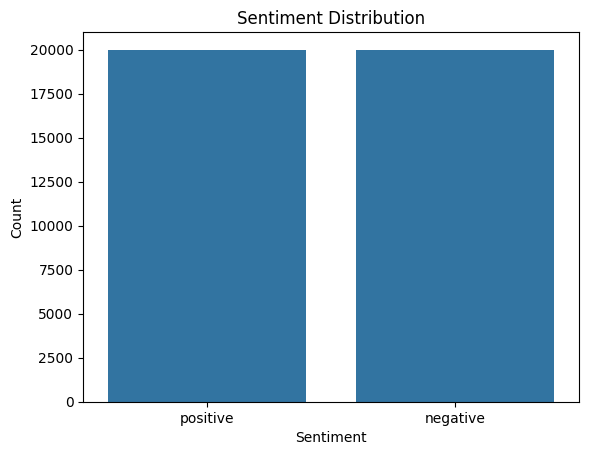

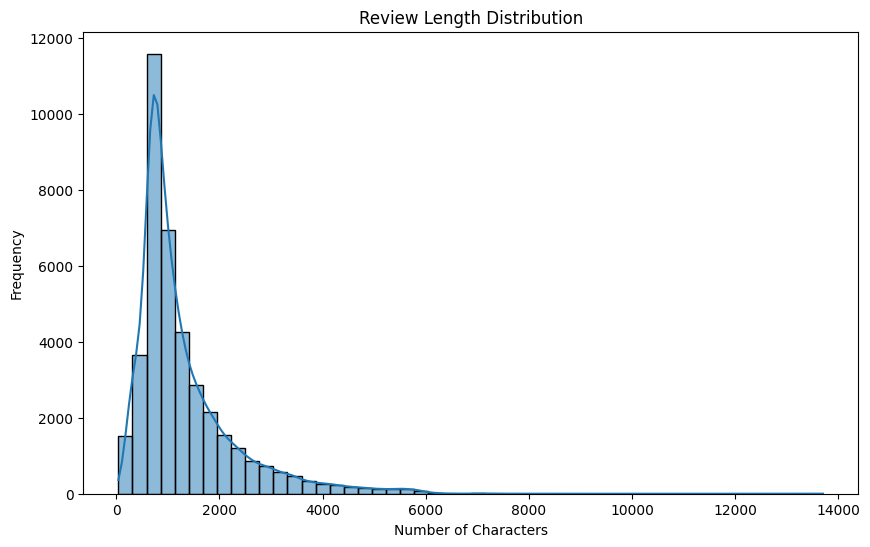

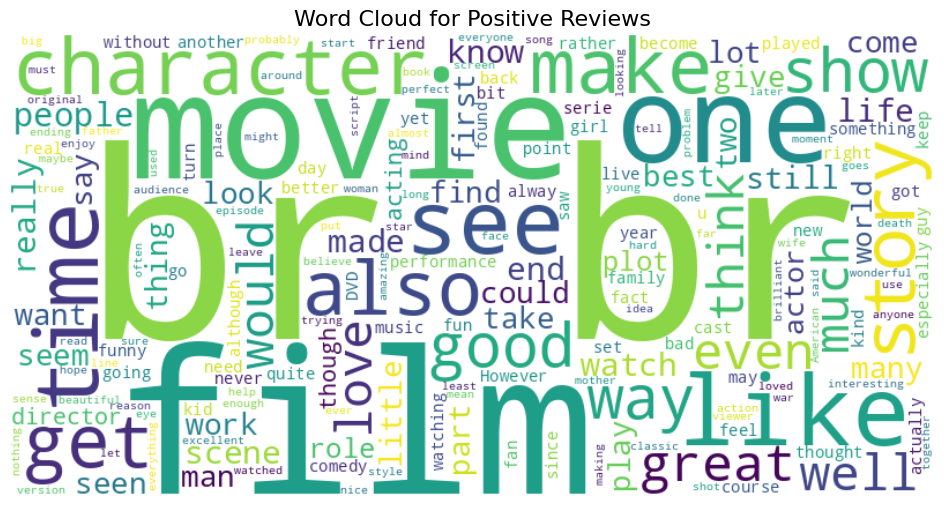

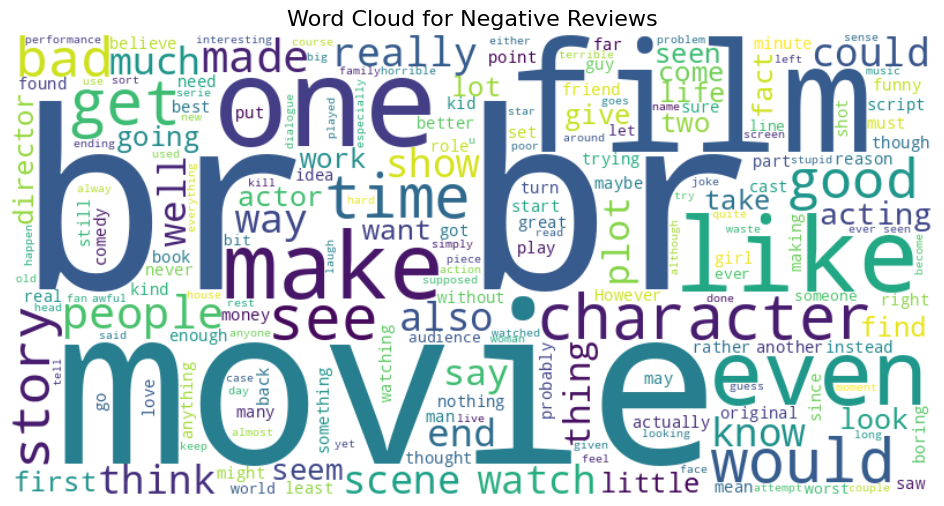

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from collections import Counter

# Download stopwords if not already
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Basic info
print(df.info())
print(df['sentiment'].value_counts())

# Plot class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Add review length
df['review_length'] = df['review'].apply(len)

# Plot review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

# WordCloud for positive and negative reviews
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'].values)
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'].values)

generate_wordcloud(positive_reviews, "Word Cloud for Positive Reviews")
generate_wordcloud(negative_reviews, "Word Cloud for Negative Reviews")


## Basic Text Preprocessing
Text cleaning included:
*   Lowercasing
*   Removing HTML tags, punctuation, numbers
*   Stopword removal using NLTK
*   The normalization techniques is used: **Stemming** (PorterStemmer)
*   It is also possible to use: **Lemmatization** (WordNetLemmatizer) /consider more accurate linguistically, not included in this notebook/

In [ ]:
# Code for normalization techniques:

# Stemming
#stemmer = PorterStemmer()
#df["processed"] = df["cleaned"].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

# OR

# Lemmatization (may be more accurate)
#lemmatizer = WordNetLemmatizer()
#df["processed"] = df["cleaned"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


In [3]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Clean text: remove HTML, punctuation, numbers, etc.
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

df["cleaned"] = df["review"].apply(clean_text)

# Remove stopwords
stop_words = set(stopwords.words("english"))
df["cleaned"] = df["cleaned"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Stemming

In [4]:
# Stemming
stemmer = PorterStemmer()
df["processed"] = df["cleaned"].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))


##  Vectorization

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# You can also try CountVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(df["processed"])

# Encode target
y = df["sentiment"].map({"positive": 1, "negative": 0})


## Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Build and Evaluate Models

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds, target_names=["negative", "positive"]))
    print("-" * 60)


Naive Bayes Accuracy: 0.8570
              precision    recall  f1-score   support

    negative       0.85      0.86      0.86      3984
    positive       0.86      0.85      0.86      4016

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000

------------------------------------------------------------
Logistic Regression Accuracy: 0.8858
              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      3984
    positive       0.88      0.90      0.89      4016

    accuracy                           0.89      8000
   macro avg       0.89      0.89      0.89      8000
weighted avg       0.89      0.89      0.89      8000

------------------------------------------------------------
Linear SVC Accuracy: 0.8798
              precision    recall  f1-score   support

    negative       0.88      0.87      0.88      3984
    positive       0.

Detailed Observations:

*   Naive Bayes surpassed the target threshold (0.85) and served as a strong baseline.
*   Logistic Regression achieved the highest accuracy (0.8858)
and balanced precision/recall for both classes.
*   Linear SVC also performed well but slightly underperformed compared to Logistic Regression.






## **Final Model Selection**
### Chosen Model: **Logistic Regression**
**Reasoning:**
Best overall accuracy, precision, recall, and F1-score
Robust across both classes
Fast and interpretable for production deployment
## **Conclusion**:
The classifier demonstrates strong performance and meets the target metric. It is well-suited for real-world sentiment analysis tasks.